In [1]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from scipy import linalg
import scipy.stats as stats
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

In [2]:
bhdata=datasets.load_boston()

In [3]:
featuredata=bhdata.data

In [4]:
bhdata.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
colnames=bhdata.feature_names
colnames

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
data = pd.DataFrame(featuredata,columns=colnames)

In [7]:
data['target']=bhdata.target

In [8]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
#Data Preprocessing

In [10]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

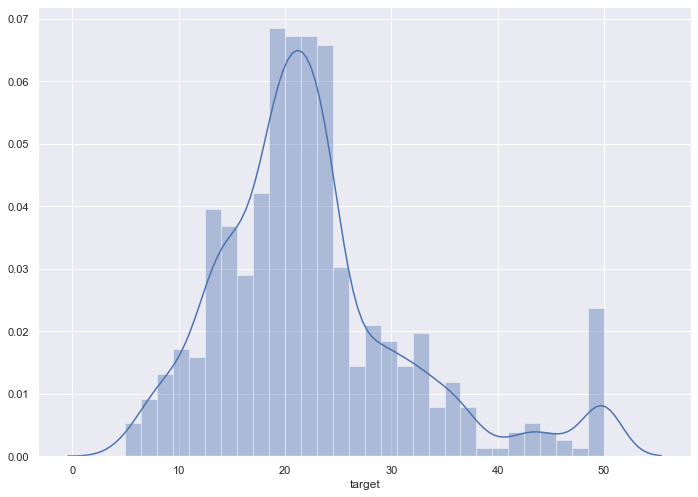

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['target'], bins=30)
plt.show()

In [12]:
corr= data.corr().round(2)
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


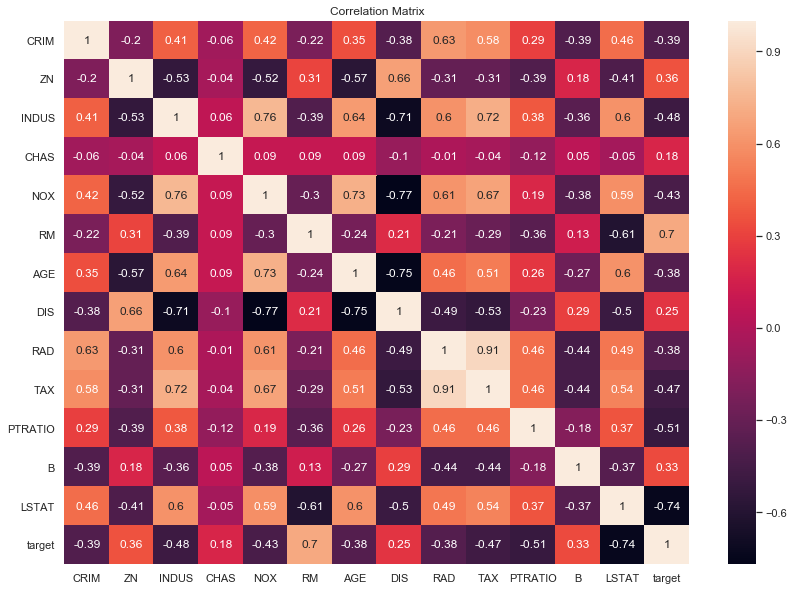

In [13]:
plt.figure(figsize=(14, 10))
# annot = True to print the values inside the square
ax=sns.heatmap(data=corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlation Matrix")
plt.show()

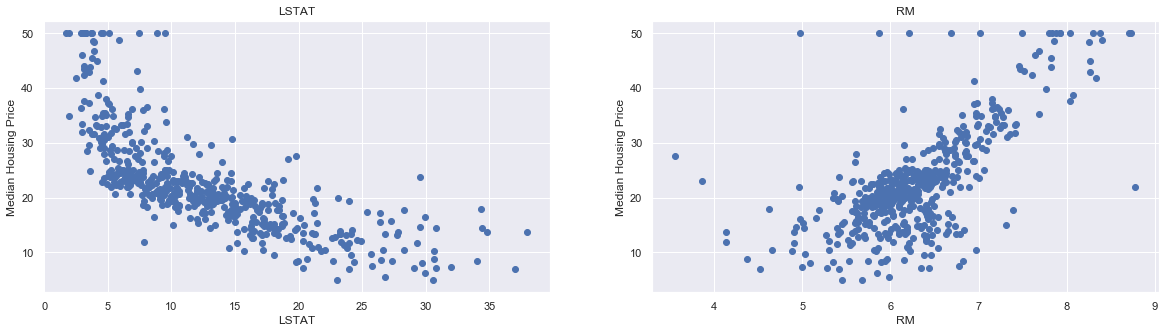

In [14]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = data['target']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Median Housing Price')

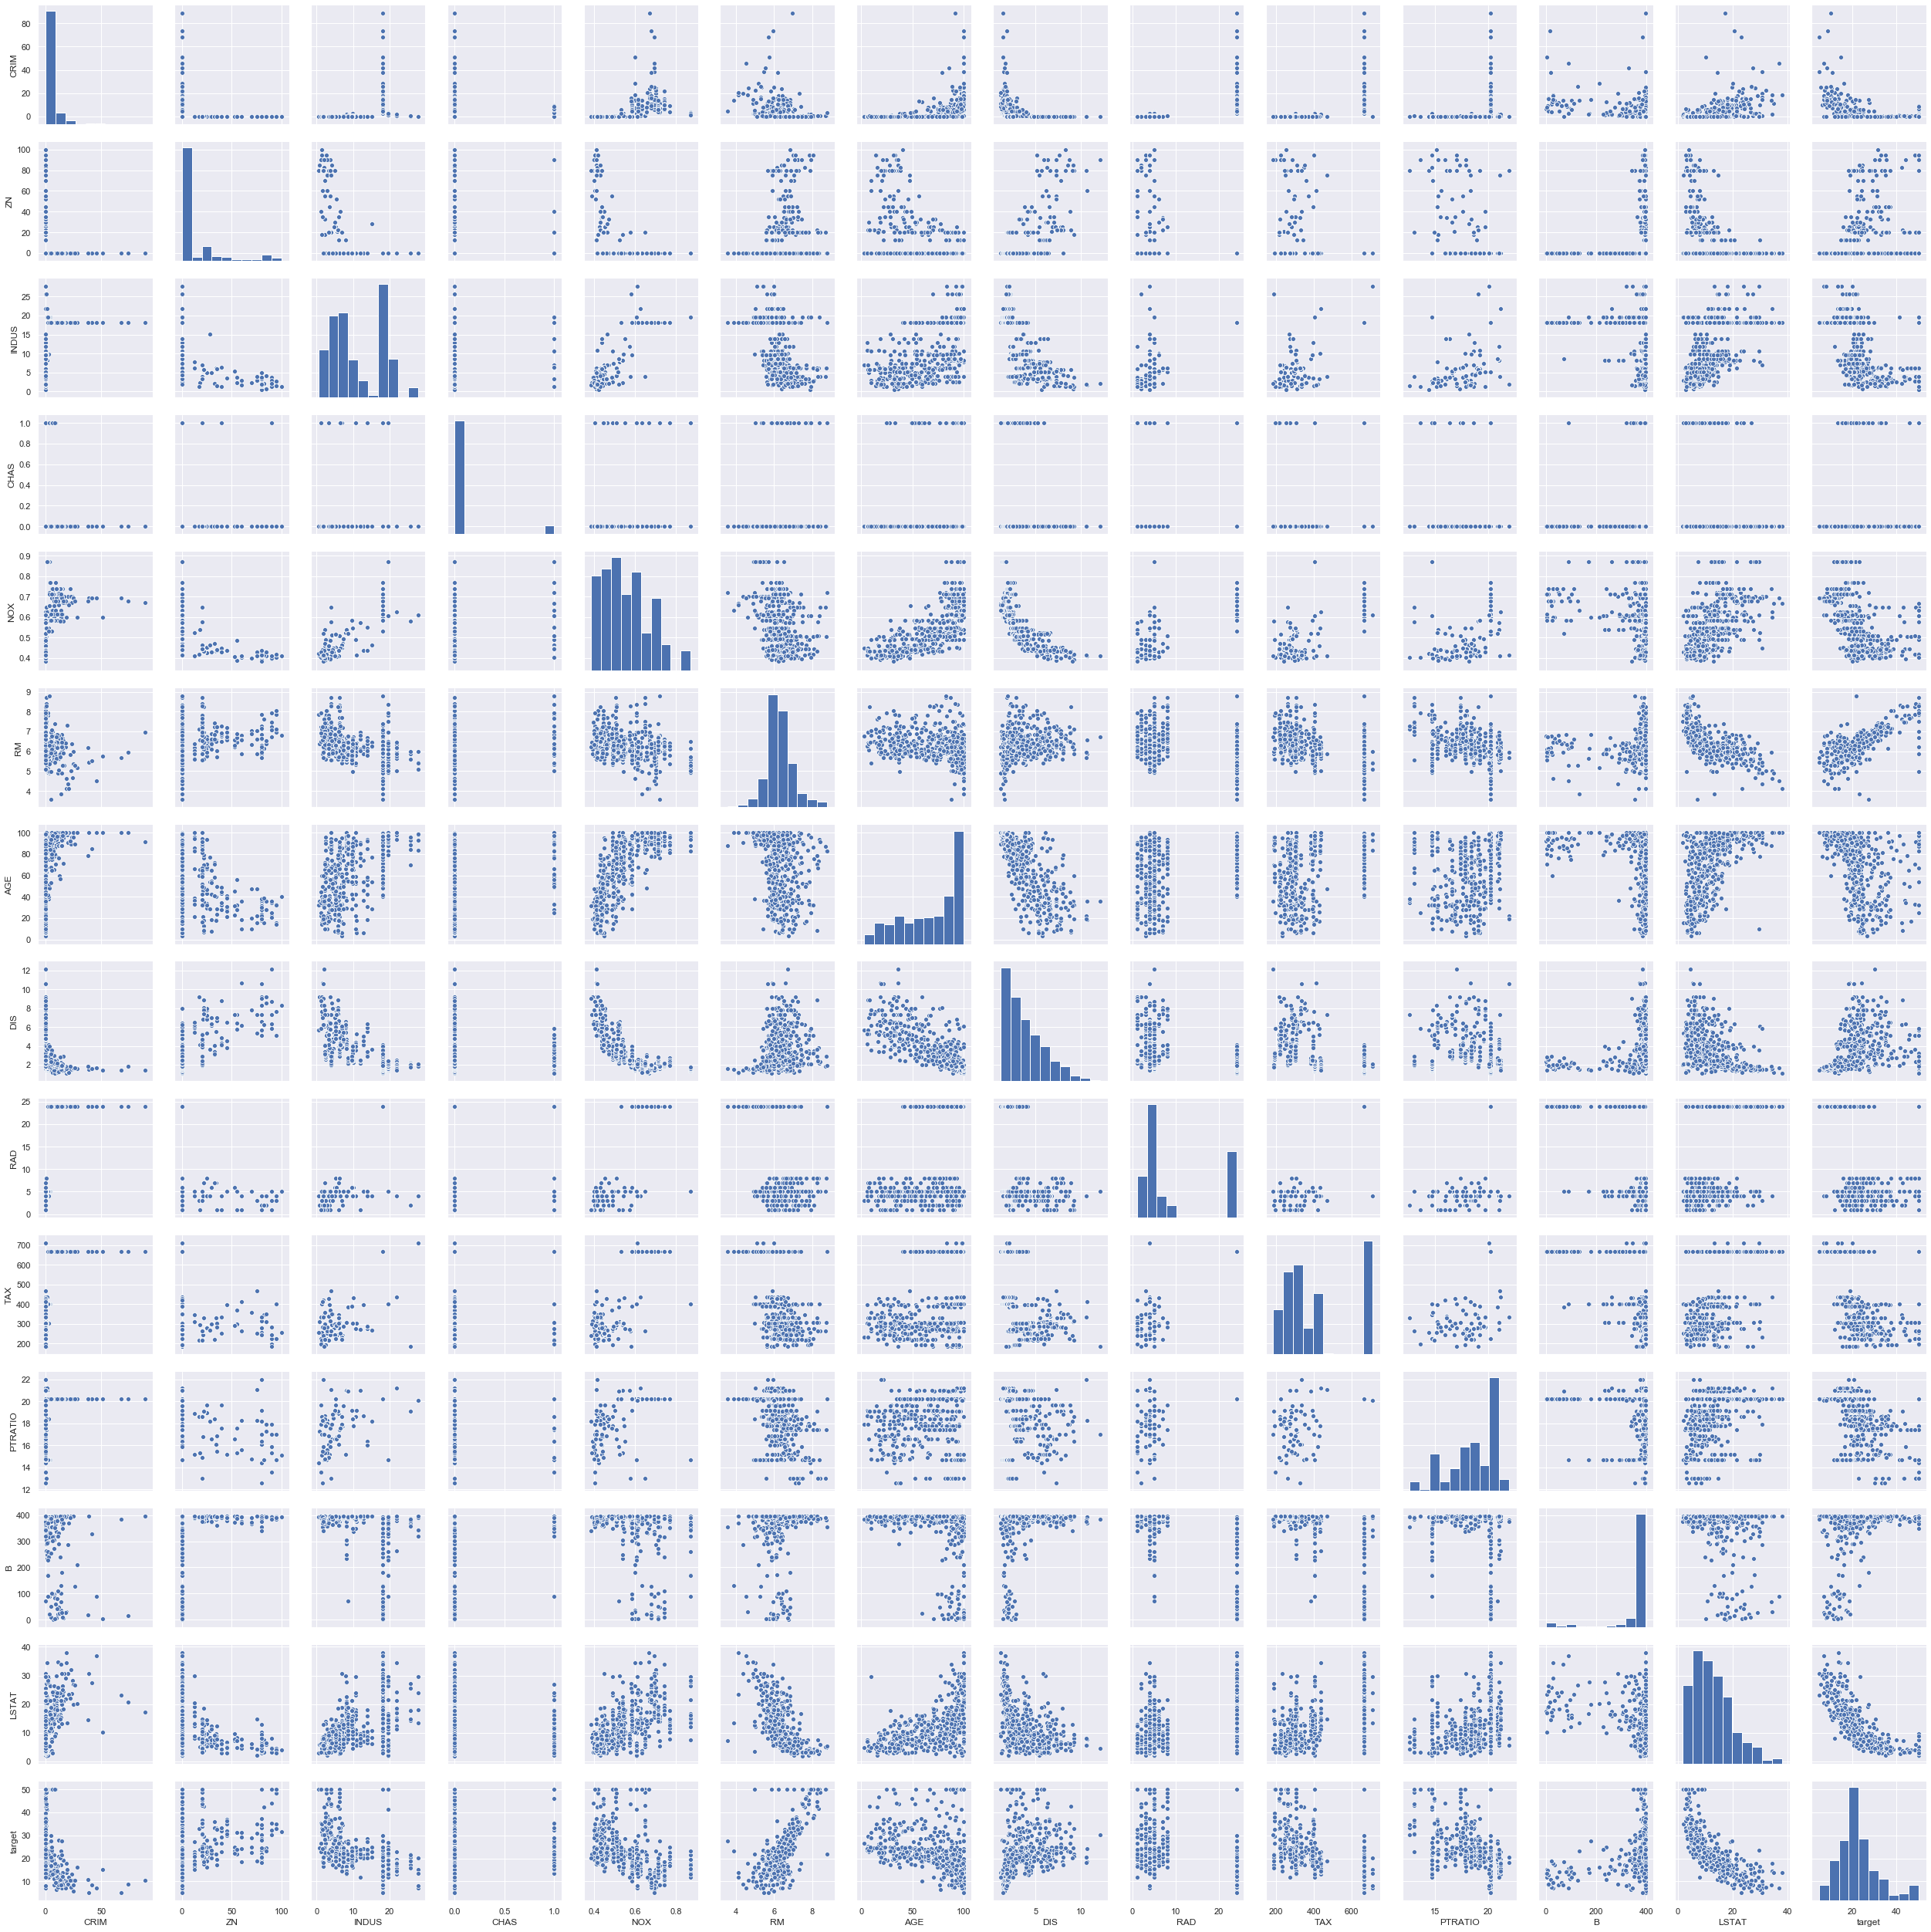

In [15]:
#How can we look at all the data at one.
#Pairwise correlation plot

sns.pairplot(data)

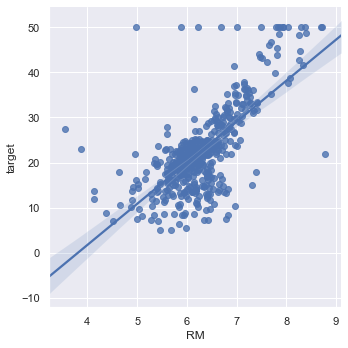

In [16]:
sns.lmplot(x = 'RM', y = 'target', data = data)

In [17]:
#SUmmary Statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [18]:
#split the dataset into Train and Test dataset

In [19]:
data_train, data_test = train_test_split(data, test_size=0.20, shuffle=True,random_state=1234)

In [20]:
data_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
221,0.40771,0.0,6.20,1.0,0.507,6.164,91.3,3.0480,8.0,307.0,17.4,395.24,21.46,21.7
375,19.60910,0.0,18.10,0.0,0.671,7.313,97.9,1.3163,24.0,666.0,20.2,396.90,13.44,15.0
450,6.71772,0.0,18.10,0.0,0.713,6.749,92.6,2.3236,24.0,666.0,20.2,0.32,17.44,13.4
163,1.51902,0.0,19.58,1.0,0.605,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
402,9.59571,0.0,18.10,0.0,0.693,6.404,100.0,1.6390,24.0,666.0,20.2,376.11,20.31,12.1


In [21]:
print(data_train.shape,data_test.shape)

(404, 14) (102, 14)


In [22]:
data_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
64,0.01951,17.5,1.38,0.0,0.4161,7.104,59.5,9.2229,3.0,216.0,18.6,393.24,8.05,33.0
100,0.14866,0.0,8.56,0.0,0.5200,6.727,79.9,2.7778,5.0,384.0,20.9,394.76,9.42,27.5
400,25.04610,0.0,18.10,0.0,0.6930,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77,5.6
485,3.67367,0.0,18.10,0.0,0.5830,6.312,51.9,3.9917,24.0,666.0,20.2,388.62,10.58,21.2
454,9.51363,0.0,18.10,0.0,0.7130,6.728,94.1,2.4961,24.0,666.0,20.2,6.68,18.71,14.9


In [23]:
XTrain = data_train.iloc[:,0:(data_train.shape[1]-1)].values
XTrain

array([[4.07710e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.95240e+02, 2.14600e+01],
       [1.96091e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 1.34400e+01],
       [6.71772e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.20000e-01, 1.74400e+01],
       ...,
       [8.19900e-02, 0.00000e+00, 1.39200e+01, ..., 1.60000e+01,
        3.96900e+02, 1.04000e+01],
       [3.75780e-01, 0.00000e+00, 1.05900e+01, ..., 1.86000e+01,
        3.95240e+02, 2.39800e+01],
       [1.00000e-01, 3.40000e+01, 6.09000e+00, ..., 1.61000e+01,
        3.90430e+02, 4.86000e+00]])

In [24]:
YTrain=data_train['target']

In [25]:
XTest = data_test.iloc[:,0:(data_test.shape[1]-1)].values

In [26]:
YTest=data_test['target']

In [27]:
XTrain.shape, XTest.shape

((404, 13), (102, 13))

In [28]:
#Multiple Linear Regression Model
reg= linear_model.LinearRegression(normalize=True)

In [29]:
?LinearRegression

Object `LinearRegression` not found.


In [30]:
reg.fit(XTrain, YTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [31]:
print("Coefficients: \n", reg.coef_)

Coefficients: 
 [-1.02035256e-01  6.01151037e-02  3.47699609e-02  3.00350930e+00
 -2.04147071e+01  2.89371393e+00 -5.32341284e-03 -1.76260440e+00
  3.38923461e-01 -1.34787063e-02 -1.01921362e+00  1.03741454e-02
 -5.25691400e-01]


In [32]:
reg.score(XTrain, YTrain)

0.7250262924717079

In [33]:
colnames

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [34]:
reg.singular_

array([2.47004049, 1.19378782, 1.13693485, 0.92671208, 0.9129516 ,
       0.80169307, 0.72711342, 0.63006843, 0.53325561, 0.47417096,
       0.43184364, 0.40818321, 0.24120501])

In [35]:
?LinearRegression

Object `LinearRegression` not found.


In [36]:
pd.DataFrame(zip(colnames,reg.coef_),columns=['Input_features','Model_Coefficients'])

,Input_features,Model_Coefficients
0,CRIM,-0.102035
1,ZN,0.060115
2,INDUS,0.034770
3,CHAS,3.003509
4,NOX,-20.414707
5,RM,2.893714
6,AGE,-0.005323
7,DIS,-1.762604
8,RAD,0.338923
9,TAX,-0.013479


In [37]:
reg.intercept_

45.73718122895488

In [38]:
# predicting the test set results 
Y_pred = reg.predict(XTest) 

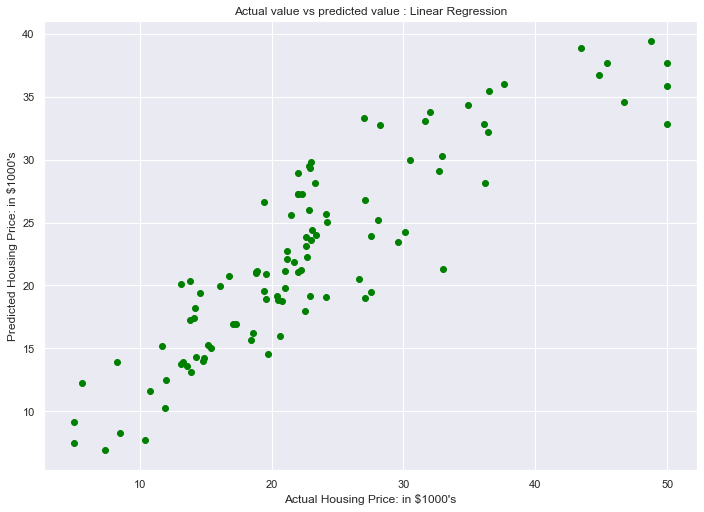

In [39]:
# Plotting Scatter graph to show the prediction  
# results - 'y_actual' value vs 'y_pred' value 
plt.scatter(YTest, Y_pred, c = 'green') 
plt.xlabel("Actual Housing Price: in $1000's") 
plt.ylabel("Predicted Housing Price: in $1000's") 
plt.title("Actual value vs predicted value : Linear Regression") 
plt.show() 

In [40]:
#Adjusted R-Square
def AdjustedRSquare(model,X,Y):
    YHat= model.predict(X)
    n,k = X.shape
    sse = np.sum(np.square(YHat-Y),axis=0)
    sst = np.sum(np.square(Y-np.mean(Y)),axis=0)
    R2 = 1 - sse/sst
    adjR2 = R2 - (1- R2)*(float(k)/(n-k-1))
    return adjR2, R2

In [41]:
#https://www.xspdf.com/help/50077476.html
#Return P-Value
def ReturnPValue(model,X,Y):
    YHat= model.predict(X)
    n,k = X.shape
    sse = np.sum(np.square(YHat-Y),axis=0)
    x = np.hstack((np.ones((n,1)),np.matrix(X)))
    df = float(n-k-1)
    sampleVar = sse/df
    sampleVarianceX = x.T*x
    covarianceMatrix = linalg.sqrtm(sampleVar*sampleVarianceX.I)
    se = covarianceMatrix.diagonal()[1:]
    betasTstat = np.zeros(len(se))
    for i in range(len(se)):
        betasTstat[i] = model.coef_[i]/se[i]
    betasPvalue = 1- stats.t.cdf(abs(betasTstat),df)
    return betasPvalue

In [42]:
reg.BetasPValue=ReturnPValue(reg,XTrain,YTrain)
reg.BetasPValue

array([3.37440540e-03, 5.71934406e-07, 2.94320725e-01, 8.51740204e-04,
       3.62271716e-07, 0.00000000e+00, 3.16207386e-01, 1.77635684e-15,
       1.18894629e-06, 0.00000000e+00, 0.00000000e+00, 7.77156117e-16,
       0.00000000e+00])

In [43]:
reg.adjR2, reg.R2 = AdjustedRSquare(reg,XTrain,YTrain)
print(reg.adjR2, reg.R2)

0.7158605022207648 0.7250262924717079


In [44]:
from sklearn import linear_model
import statsmodels.api as sm
from scipy import stats

X = XTrain
y = YTrain

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     79.10
Date:                Sat, 26 Sep 2020   Prob (F-statistic):          1.19e-100
Time:                        10:24:59   Log-Likelihood:                -1197.0
No. Observations:                 404   AIC:                             2422.
Df Residuals:                     390   BIC:                             2478.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.7372      5.822      7.856      0.0

In [45]:
# Null : Beta estimates = 0
# Alt : Beta Estimates != 0

In [46]:
print("Coefficients: \n", reg.coef_)

Coefficients: 
 [-1.02035256e-01  6.01151037e-02  3.47699609e-02  3.00350930e+00
 -2.04147071e+01  2.89371393e+00 -5.32341284e-03 -1.76260440e+00
  3.38923461e-01 -1.34787063e-02 -1.01921362e+00  1.03741454e-02
 -5.25691400e-01]


In [47]:
p_values = est2.pvalues
p_values

const    3.881689e-14
x1       8.194333e-03
x2       1.156514e-04
x3       6.242434e-01
x4       1.727984e-03
x5       2.761227e-06
x6       2.085570e-09
x7       7.266490e-01
x8       1.710638e-12
x9       1.197018e-05
x10      2.393627e-03
x11      2.158240e-11
x12      5.187726e-04
x13      8.764656e-20
dtype: float64

In [48]:
#Two methods of reporting the error from the regression model
#Mean Absolute Percentage Error (MAPE)
#Mean Sum of Square error (MSSE)

In [49]:
def ErrorMetric(model,X,Y):
    Yhat = model.predict(X)
    MAPE = np.mean(abs(Y-Yhat)/Y)*100
    MSSE = np.mean(np.square(Y-Yhat))
    return MAPE, MSSE

In [50]:
reg.TrainMAPE, reg.TrainMSSE = ErrorMetric(reg,XTrain,YTrain)
reg.TrainMAPE, reg.TrainMSSE

(16.302072875812776, 21.927002660491905)

In [51]:
reg.MAPE, reg.MSSE = ErrorMetric(reg,XTest,YTest)
reg.MAPE, reg.MSSE

(16.909381848539258, 23.964571384956862)

In [52]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

print('MAE', mean_absolute_error(YTest, Y_pred))
print('MSE', mean_squared_error(YTest, Y_pred))
print('RMSE', np.sqrt(mean_squared_error(YTest, Y_pred)))
print('R squared error', r2_score(YTest, Y_pred))

MAE 3.5789349138336295
MSE 23.96457138495685
RMSE 4.895362232251752
R squared error 0.7665382927362876


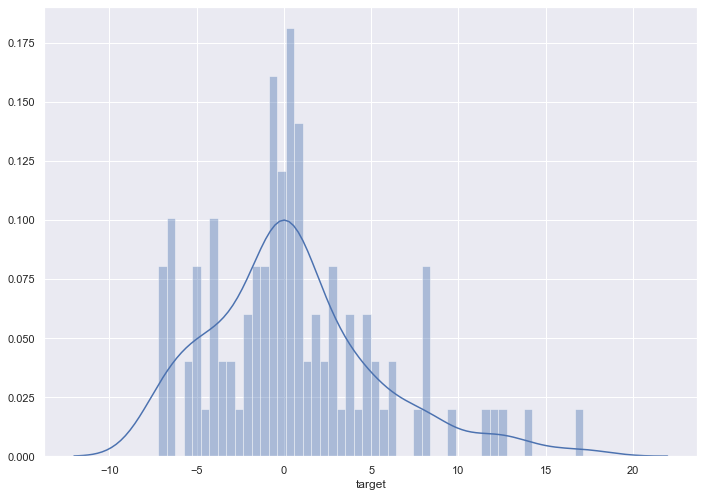

In [53]:
sns.distplot((YTest-Y_pred),bins=50)

In [54]:
# Check for multi Collinearity
# Coefficient estimates may not be reliable
# Consider removing variables with a high Variance Inflation Factor (VIF)

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
print('Variance Inflation Factors (VIF)')
print('> 10: An indication that multicollinearity may be present')
print('> 100: Certain multicollinearity among the variables')
print('-------------------------------------')
       
# Gathering the VIF for each variable
VIF = [variance_inflation_factor(featuredata, i) for i in range(featuredata.shape[1])]
for idx, vif in enumerate(VIF):
    print('{0}: {1}'.format(colnames[idx], vif))

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
CRIM: 2.1003728199615233
ZN: 2.8440132669462646
INDUS: 14.485757706539331
CHAS: 1.1529518589418777
NOX: 73.89494652814788
RM: 77.94828304638538
AGE: 21.38685048994314
DIS: 14.6996523837492
RAD: 15.167724857920897
TAX: 61.227274009649456
PTRATIO: 85.02954731061801
B: 20.10494263622909
LSTAT: 11.102024772203539


In [56]:
# Test for homoscedasticity, which is the same variance within our error terms
# Heteroscedasticity means we don’t have an even variance across the error terms.
# Significance tests for coefficients due to the standard errors being biased. 
# Additionally, the confidence intervals will be either too wide or too narrow.

In [57]:
residuals = abs(YTest)-abs(Y_pred)
residuals

64     11.679786
100     3.590980
400    -6.669407
485    -0.881963
454     0.688714
         ...    
350     3.713237
191     0.535395
239    -4.824023
109    -0.147114
219    -6.829834
Name: target, Length: 102, dtype: float64

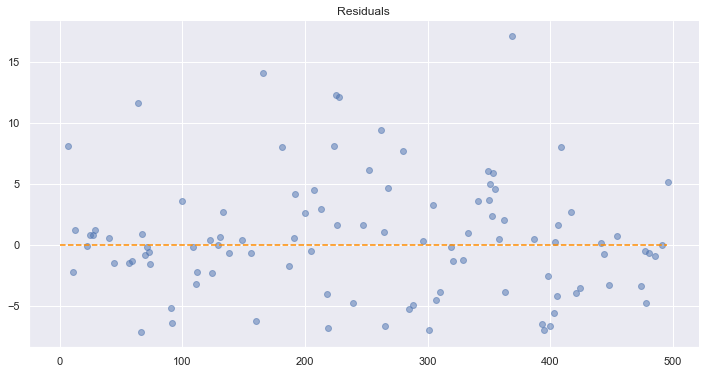

In [58]:
# Plotting the residuals
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=residuals.index, y=residuals, alpha=0.5)
plt.plot(np.repeat(0, residuals.index.max()), color='darkorange', linestyle='--')
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show()  